# Problem 3

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

### Part 1 (Only coins touching the boundary)

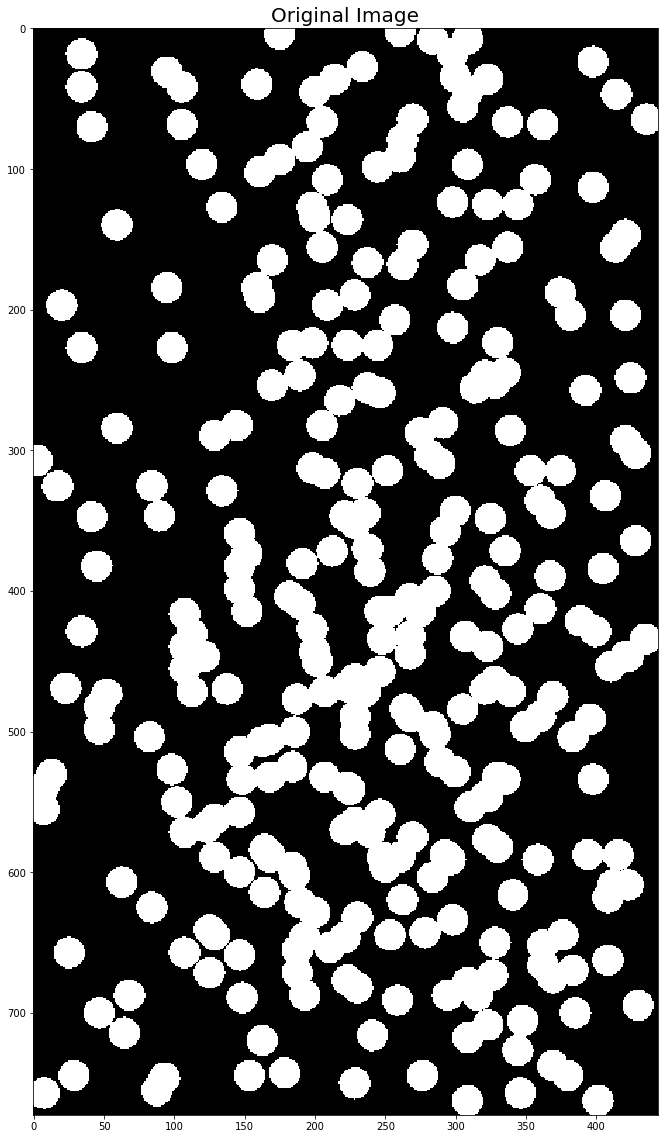

In [3]:
img = cv2.imread('../input_data/coins.jpg', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
#img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)), iterations=2)
#img = cv2.dilate(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)),iterations=1)
visited = np.zeros(img.shape)
boundary_flag = 0
images = []
subtitles = []
images.append(img)
subtitles.append('Original Image')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [4]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    if row == 0 or col == 0 or row == (img.shape[0] - 1) or col == (img.shape[1] - 1):
        #print("Hi")
        return 1
    visited[row][col] = color
    return (dfs(row + 1, col, color) | dfs(row - 1, col, color) | dfs(row, col + 1, color) | dfs(row, col - 1, color))

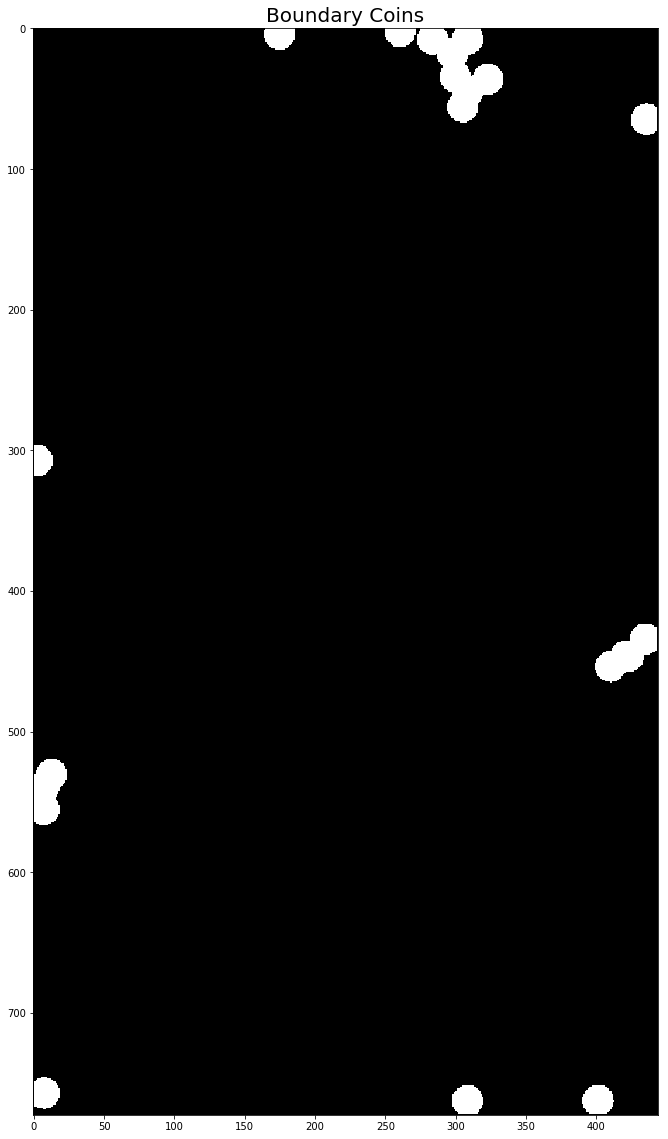

In [5]:
color = 1
boundary_colors = {}
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            boundary_flag = 0
            if dfs(i, j, color) == 1:
                boundary_colors[color] = 1
            color += 1
        else:
            continue
output = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] in boundary_colors.keys():
            output[i][j] = 1
        else:
            output[i][j] = 0
images = []
subtitles = []
images.append(output)
subtitles.append('Boundary Coins')
display_images(images, 1, 1, (20, 20), '', subtitles)

##### End of Part 1

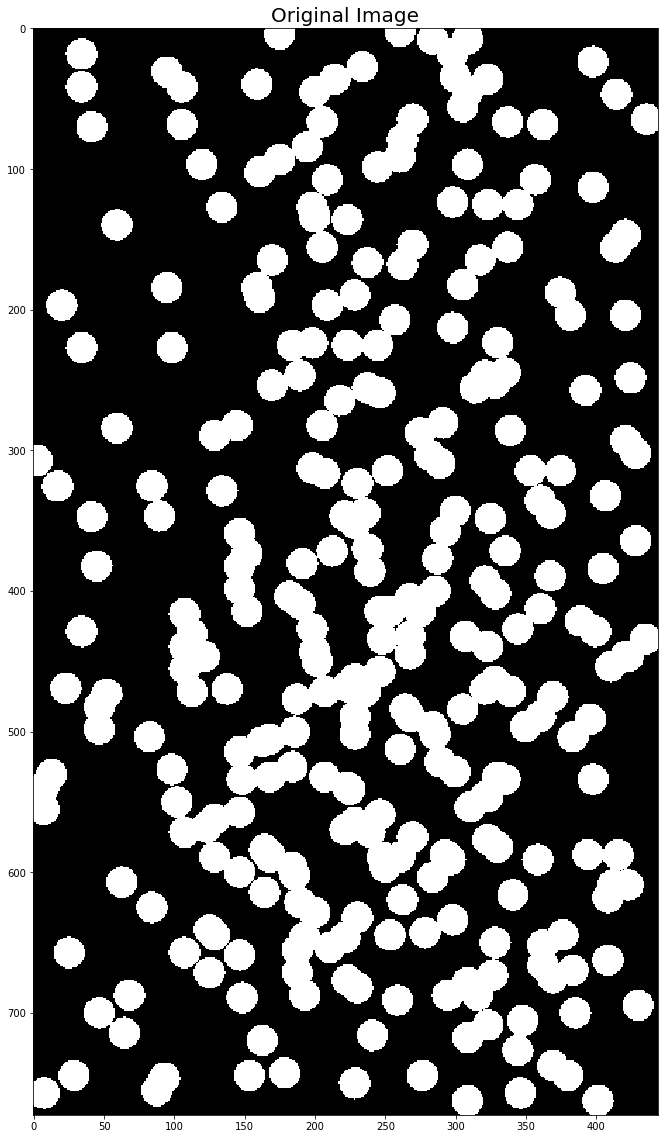

In [6]:
img = cv2.imread('../input_data/coins.jpg', cv2.IMREAD_GRAYSCALE)
img = (img > 127).astype(np.uint8)
visited = np.zeros(img.shape)
images = []
subtitles = []
images.append(img)
subtitles.append('Original Image')
display_images(images, 1, 1, (20, 20), '', subtitles)

In [7]:
def dfs(row, col, color):
    if row < 0 or col < 0 or row >= img.shape[0] or col >= img.shape[1]:
        return 0
    if img[row][col] == 0:
        return 0
    if visited[row][col] != 0:
        return 0
    visited[row][col] = color
    return (1 + dfs(row + 1, col, color) + dfs(row - 1, col, color) + dfs(row, col + 1, color) + dfs(row, col - 1, color))

In [8]:
non_overlap_area = 450
color = 1
overlap_colors = {}
non_overlap_colors = {}
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] == 0 and img[i][j] == 1:
            if dfs(i, j, color) > non_overlap_area:
                overlap_colors[color] = 1
            else:
                non_overlap_colors[color] = 1
            color += 1
        else:
            continue

### Part 2 (Only the coins which overlap with each other)

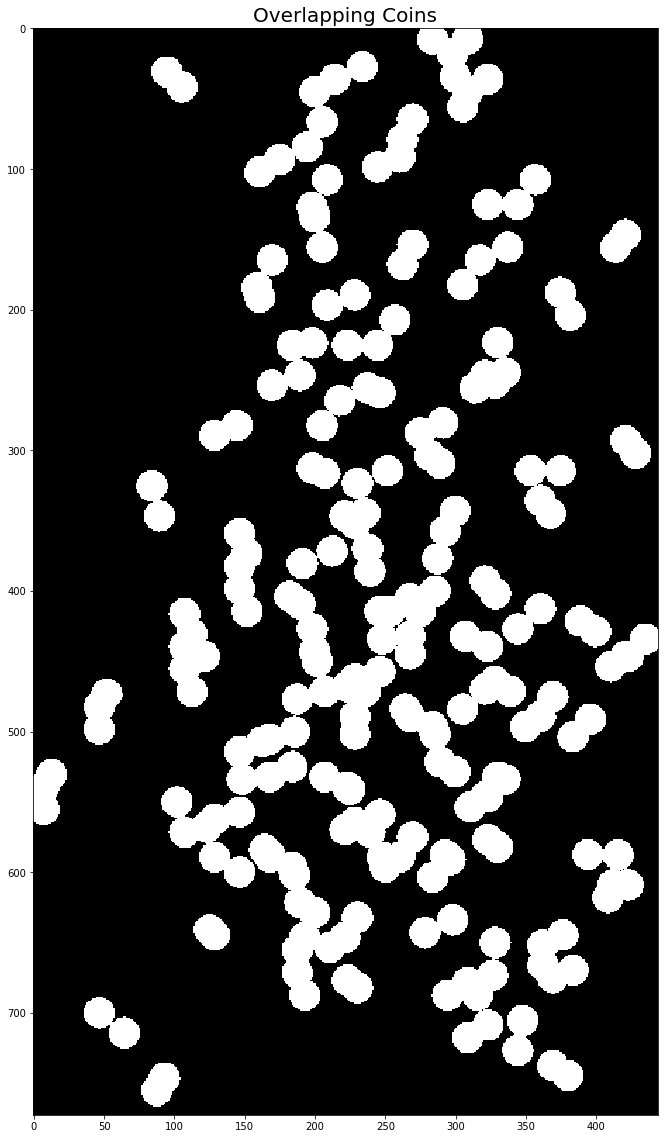

In [9]:
output = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] in overlap_colors.keys():
            output[i][j] = 1
        else:
            output[i][j] = 0
images = []
subtitles = []
images.append(output)
subtitles.append('Overlapping Coins')
display_images(images, 1, 1, (20, 20), '', subtitles)

### Part 3 (Only non overlapping coins)

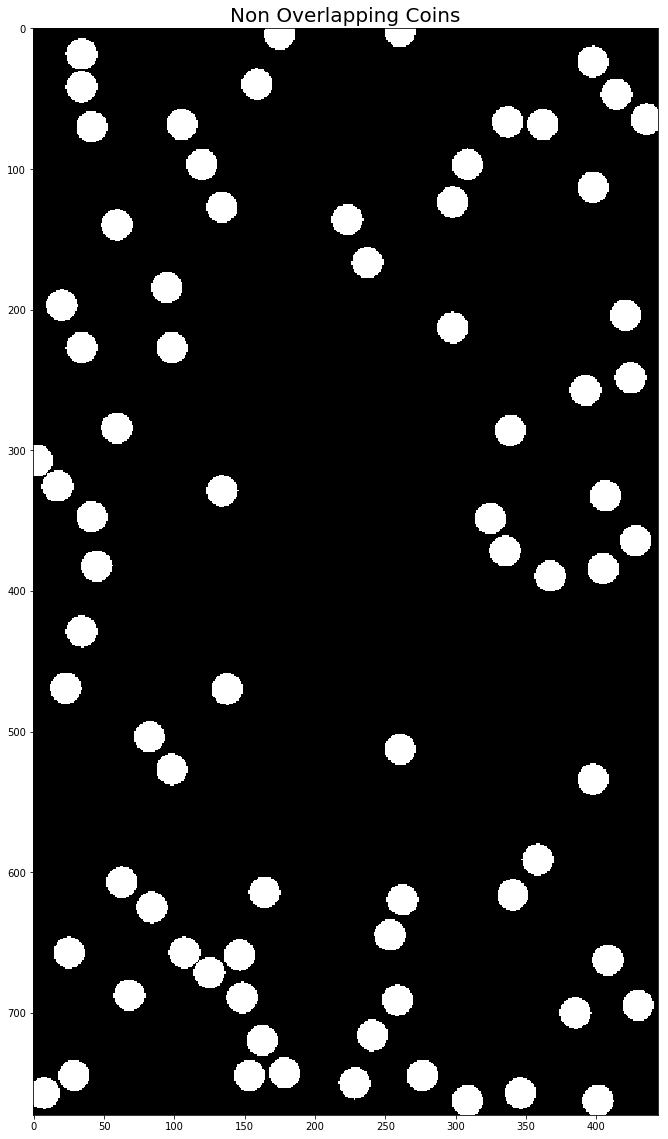

In [10]:
output = np.zeros(img.shape)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if visited[i][j] in non_overlap_colors.keys():
            output[i][j] = 1
        else:
            output[i][j] = 0
images = []
subtitles = []
images.append(output)
subtitles.append('Non Overlapping Coins')
display_images(images, 1, 1, (20, 20), '', subtitles)